# Novel Enhanced Quantum Representation (NEQR) for Digital Images

The **Novel Enhanced Quantum Representation** (NEQR) is another one of the earlier forms of quantum image represention. It's similar to its predecesor the Flexible Representation of Quantum Images (FRQI)[1] in that it uses a normalized superposition to store pixels in an image. The limitation of FRQI is that it uses one qubit to store the grayscale information of the pixel, which prevents performing any complex image transformations. NEQR was created to improve over FRQI by leveraging the basis state of a qubit sequence to store the image's grayscale value [2]. 

NEQR offers the following advantages over FRQI as demonstrated in [2]:
- Quadradic speedup of the time compexity to prepare the NEQR quantum image
- Optimal image compression ratio of up to 1.5×
- Accurate image retrieval after measurement, as opposed to probabilitic as FRQI
- Complex color and many other operations can be achieved

In this section we will represent a classical 2×2 grayscaled image in a quantum computer using the NEQR model.

## 1. The NEQR Process

The NEQR process to represent an image is composed of two parts; preparation and compression and are described as follows. 

### 1.1 Image Preparation:

In order to represent an image on a quantum computer using the NEQR model, we'll first look at the various components required to do so and how they are related to each other. We'll begin with the color range of the image.

The color range of an image is represented by a bitstring as follows:

- Binary Image:

<figure>
    <img src="images/binary_key.png" style="max-width: 200px"><br>
    <img src="images/flower_binary.png" style="max-width: 300px">
    <figcaption>
        A binary image uses 1 bit per pixel, where 0 represents black and 1 represents white.
        Binary image representation of "flower flowers orange yellow" by watts_photos is licensed under <a href="https://creativecommons.org/licenses/by/2.0/">CC BY 2.0</a>
    </figcaption>
</figure>

- Grayscale Image: 

<figure>
    <img src="images/grey_key.png" style="max-width: 300px"><br>
    <img src="images/flower_grey.png" style="max-width: 300px">
    <figcaption>
        In a greyscale image, multiple bits represent the various shades of gray intensity. With 8 bits this is between 0 (black) and 255 (white).
        Greyscale key, with greyscale representation of "flower flowers orange yellow" by watts_photos is licensed under <a href="https://creativecommons.org/licenses/by/2.0/">CC BY 2.0</a>
    </figcaption>
</figure>

- Color Image: 

<figure>
    <img src="images/color_key.png" style="max-width: 300px"><br>
    <img src="images/flower.jpg" style="max-width: 400px">
    <figcaption>
        We can represent a colour image using 24 bits, broken up into 3 groups of 8 bits, where each group of 8 bits represents the Red, Green, and Blue intensities of the pixel color.
        Colour key with "flower flowers orange yellow" by watts_photos is licensed under <a href="https://creativecommons.org/licenses/by/2.0/">CC BY 2.0</a>
    </figcaption>
</figure>

In our example we will represent the pixels by their position in the image. Since we will be representing a two-dimensional image, we will define the position of the image by its row and column, Y, X, respectively. 


**Note** In image processing the pixel positions are represented as they would on the X-Y plane, which is why the column numbers are represented by the value X, and the row numbers are represented by the value Y. 


### 1.2 Image Compression:

When the quantum representation of the image is completed, we will check the depth and size of the circuit created and provide some options to compress the generated NEQR circuit. 


Now, let's get started by encoding a 2x2 quantum image as follows.

## 2. Encoding a 2x2 Image

In this example we will encode a 2x2 grayscale image where each pixel value will contain the following values. 

![](images/2x2grey.png)


    00 = 00000000 (Black)  

    01 = 01010101 (Grayscale = 85)

    10 = 10101010 (Grayscale = 170)

    11 = 11111111 (White)


To encode these pixels we will need to define our quantum registers, the first register we will use to store the pixel position. Since this is a 2D image we will need two variables relates to the horizontal (column) and the other the vertical (row), Y and X respectively. 

The color value of each pixel will is denoted as $\mathcal{f}(Y,X)$, where Y and X specify the pixel position in the image.

The range of the grayscale intensity for each pixel can vary, however since the most common grayscale range is generally from 0 - 256, the values is usually denoted as $2^{q}$, where for 256, we can confirm $q=8$. Where $q$ would represents the number of bits needed for the binary sequence of colors: $C^{0}, C^{1},.. C^{q-2}, C^{q-1}$. 

This means that each pixel value can be represented as follows:

$$
\mathcal{f}(Y,X) = C^{0}_{YX}, C^{1}_{YX},... C^{q-2}_{YX}, C^{q-1}_{YX} \in [0,1], \;\; f(Y,X)\in[0, 2^{q-1}]
$$


Therefore, the general expression to represent a quantum image for a $2^{n}$x $2^{n}$ image $|I\rangle$ is:

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|}$

$$
|I\rangle = \frac{1}{2^{n}}\sum_{Y=0}^{2^{2n-1}} \sum_{X=0}^{2^{2n-1}} | \mathcal{f}(Y,X)\rangle |Y X\rangle = \frac{1}{2^{n}}\sum_{Y=0}^{2^{2n-1}} \sum_{X=0}^{2^{2n-1}} \vert\otimes_{i=0}^{q-1}\rangle |C_{YX}^{i}\rangle |Y X\rangle
$$

Translating the equation above to our 2x2 example pixel values would result in the following: 

$$
\mathsf{\Omega}_{YX}|0\rangle^{\otimes q} = \frac{1}{\sqrt[]{2}}(|00000000\rangle |00\rangle + |01010101\rangle |01\rangle + |10101010\rangle |10\rangle + |11111111\rangle |11\rangle)
$$

Where 

$$
\mathsf{\Omega}_{YX}|0\rangle
$$

is the quantum operation which represents the value-setting operation for pixel at position (Y, X). 


### 2.1 Create the Quantum Circuit for our Image

We'll first create our quantum circuit with the specific number of qubits needed to encode the image. To do this let's create two separate quantum circuits, one for the pixel values, and the other for the pixel positions.

Our first quantum circuit will include the $2^n$ qubits used to represent the pixel value $f(Y,X)$, where in this case will have 8 qubits. 

In [1]:
# Importing standard Qiskit libraries and load account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import *
import numpy as np

# Loading your IBM Q account
provider = IBMQ.load_account()

In [2]:
# Initialize the quantum circuit for the image 
num_qubits = 10
anc = 0 #3
total_qubits = num_qubits+anc
qc_image = QuantumCircuit(total_qubits, 2)

Our second quantum circuit will include the 2 qubits to represent the pixel positions, where one qubit refers to the X and other to the Y postion. We will add a Hadamard gate here so we can ensure to capture all pixel positions. 


Let's code this up!

In [3]:
# Create the pixel position qubits for (Y, X), and place them in superposition.
qc_pos = QuantumCircuit(2)
qc_pos.h(0)
qc_pos.h(1)

### 2.2 Representation of a Grayscale Image on a Quantum Circuit

Now that we have our quantum circuits created, let's start our first step which is to prepare our circuit by combining both the pixel position circuit together with the image circuit. We'll include Identity gates and Barriers for ease of readability. 

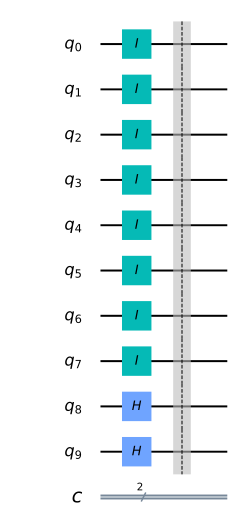

In [4]:
# Setup color value qubits
qc_grayscale = QuantumCircuit(8)
for idx in range(8):
    qc_grayscale.i(idx)

# Compose the circuit by appending the pixel and grayscale qubits
qc_image.compose(qc_pos, qubits=[num_qubits-1,num_qubits-2], inplace=True)
qc_image.compose(qc_grayscale, qubits=[0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

Now let's encode our pixel values. Recall the values we set each pixel was as follows: 

00 = 00000000 (Black)  

01 = 01010101 (Grayscale = 85)

10 = 10101010 (Grayscale = 170)

11 = 11111111 (White)

So we will start with the first pixel at position (0,0). 
Notice that we have all 0's therefore we can of course leave it blank, but let's use our Identity gates just for visualization purposes for pixel (0,0). 

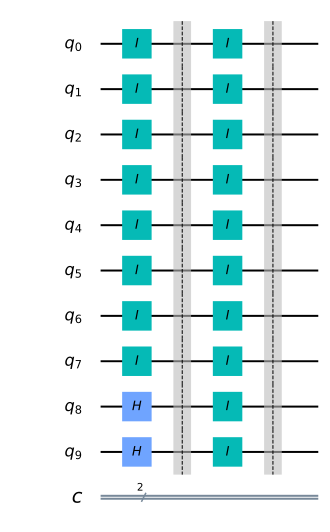

In [5]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

Next, we will encode the second pixel (0,1) whose value is (01010101). Here we will use a ControlNot gate with two-qubit controls (2-CNOT), where the Controls are triggered by the pixel position (Y,X), and the Targets rotate the $C^{i}_{YX}$ qubit which represents the pixel value.

**Note** here that because we want the CNOT gate to trigger when there the control is a combination of 0 and 1, that we wrap the qubit with X gates so it will trigger when the specified control is 0. 

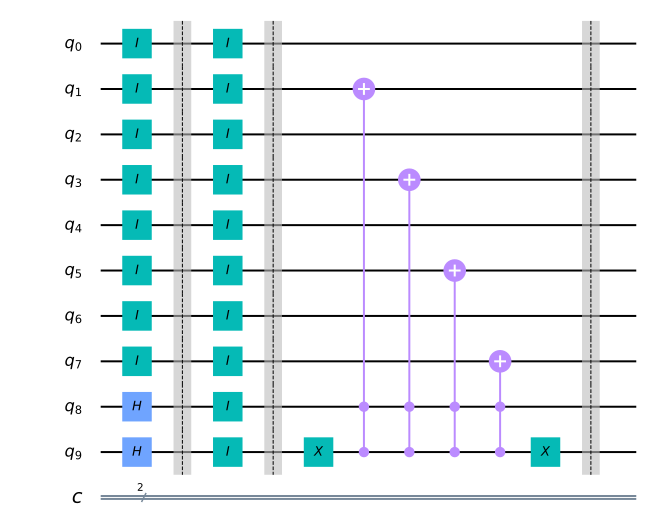

In [6]:
# Encode the second pixel whose value is (01010101):
value01 = '01010101'

# Add the 0CNOT gates, where 0 is on Y pixel:
qc_image.x(num_qubits-1)
for idx, px_value in enumerate(value01):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)
qc_image.x(num_qubits-1)


qc_image.barrier()
qc_image.draw()

We'll now move on to encode the next pixel at position (1,0) with a value of (10101010).

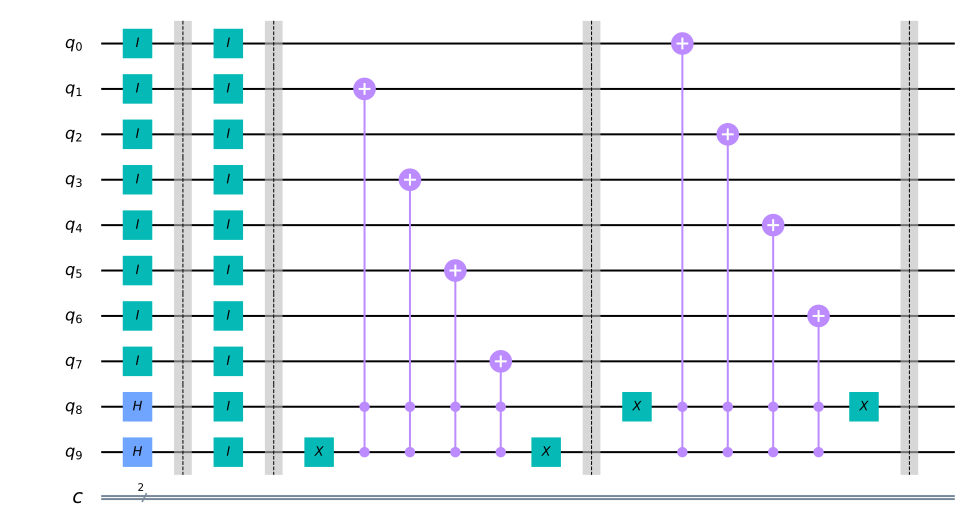

In [7]:
# Encode the third pixel whose value is (10101010):
value10 = '10101010'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

Finally, let's finish up encoding the last pixel position (1,1), with the value (11111111). 
This we simply do by adding Tofolli gates to all the pixel image values. 

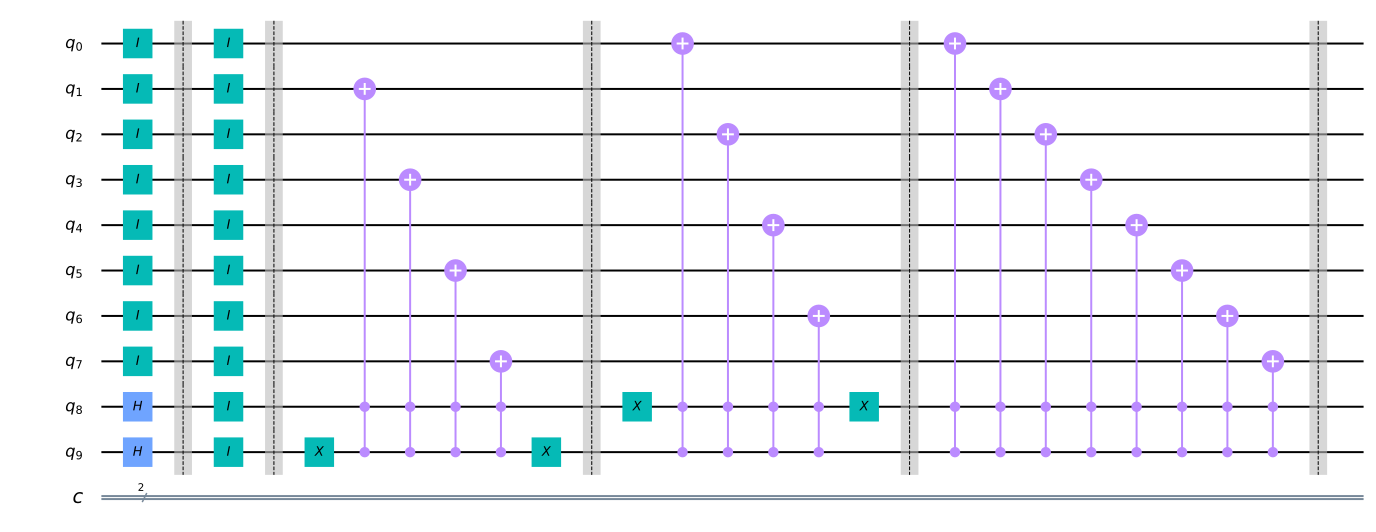

In [8]:
# Encode the third pixel whose value is (10101010):
value10 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value10):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.draw(fold=100)

Congratulations! You have successfully encoded a 2x2 pixel grayscale image! 
Now, let's take a moment to review what we have done and notice a few things. 

### 2.3 Analyze the Quantum Representation of the Image

First, let's take a look at the total number of gates we are using for this circuit. We'll use the decompose so we can strip the gates down to their basis gates.
We'll print out the depth, size, and operator counts: 

In [9]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  167
Circuit size:  264


OrderedDict([('cx', 96),
             ('t', 64),
             ('tdg', 48),
             ('h', 32),
             ('id', 18),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

### 2.4 Quantum Image Circuit Compression


As you can see, with a depth of 127 and a circuit size of 264, this is a very large and very deep quantum circuit! 
Needless to say this is not very efficient. There are of course ways to compress the image in a way to decrease the depth of the circuit and have fewer operators. One way is to use a classic compression algorithm such as the Espresso Algorithm [5], which was developed in IBM by Brayton. The Espresso algorithm is used to compress the the control information of all the CNOT gates in the circuit to a minimum set of CNOT gates. 

How this would work is that each group of gates per pixel is divided into two groups. One which has the CNOT gates to represent the pixel values when set to 1, and the Identity gate which is set to 0. For example in the second pixel (0,1) we have 4 CNOT gates. Each group $\phi_{i}$ can be represented as follows:

$$\phi_{i} = (\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=0}^{2^{n}-1} I) \cup (\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=1}^{2^{n}-1} (2n - CNOT)_{YX}))$$

The left group indicates that if the $C^{i}_{YX}=0$, then the Identity gate is used. 

The right group indicates that if $C^{i}_{YX}=1$, then a CNOT gate is used.

Therefore, it's the CNOT group which we would need to compress using the Espesso method to build a new unitary compressed group: 

$$\bigcup_{Y=0}^{2^{n}-1} \bigcup_{ {X=0}C^{i}_{YX}=1}^{2^{n}-1} YX \xrightarrow[]{\text{Espresso} } \bigcup_{K_i}K_i $$


**Extra Credit**
As an exercise, compress the 2x2 image above using the Espresso algorithm and compare the depth and size of your compressed circuit to the circuit we created above.  

## 3. References

[1] Le, P.Q., Dong, F. & Hirota, K. _A flexible representation of quantum images for polynomial preparation, image compression, and processing operations._ Quantum Inf Process 10, 63–84 (2011). https://doi.org/10.1007/s11128-010-0177-y

[2] Zhang, Y., Lu, K., Gao, Y. et al. _NEQR: a novel enhanced quantum representation of digital images._ Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[3] Cai,Yongquan et al. _Chinese Journal of Electronics(2018), 27 (4):718_ http://dx.doi.org/10.1049/cje.2018.02.012

[4] “Qiskit: An open-source framework for quantum computing,”  (2019). https://qiskit.org

[5] Brayton, R.K. Sangiovanni-Vicentelli, A. McMullen, C. Hacktel, G.: _Log Minimization Algorithms VLSI Synch_. Kluwer Academic Publishers, DOrdrecht (1984) 

In [10]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}